# Bike Sharing Challenge (JDA)

####  Creator: Prateek Rawat
#### Date: 05/17/2019

## Table of Contents:
- ### Data Description
    
    
    
- ### Exploratory Data Analysis
    1. Data Preparation
    2. Data Visulization
    3. Feature Distribution
    4. Feature Selection
   
    
    
    
    
- ### Business Questions Before Choosing a Model



    
- ### Model Design and Analysis
    
    


In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Checking Anaconda Version
import sys
sys.version

'3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]'

### Data Description

#### This dataset is about Bike-Sharing rental process which is highly correlated to the environment and seasonal settings. Our aim is to predict the total total count(cnt) of Bike booked per hour based on these charateristics.
#### The core data set is related to  the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data.

#### Dataset Consist of the following fields
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


In [3]:
# Set the path where the data file is located uncomment next 2 lines and set your path
#os.chdir("")
#os.getcwd()

In [4]:
#Load the Data
data =  pd.read_csv("../Desktop/hour.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Exploratory Data Analysis

In [5]:
# As per the data description some of the variables are categorical but presented as int/float 
#so we will change the datatype to categorical
categorical = ["season", "yr","mnth","hr","holiday","workingday","weathersit","weekday"]
for var in categorical:
    data[var] = data[var].astype("category")

In [6]:
# Cheking for negative values in dataset
data.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
# Use panda_profiling to perform intial EDA on dataset
pandas_profiling.ProfileReport(data)

Number of variables,17
Number of observations,17379
Total Missing (%),0.0%
Total size in memory,1.3 MiB
Average record size in memory,80.1 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,2


### Findings from profiling
    1. There are no missing and duplicate values.
    2. We need to do dummy variable creation / one-hot encoding for the categorical variables.
    3. We need to correlation plots to check which feature to remove from atemp and temp as they are highly correlated.
    4. As per the undertanding of the data descriptiona and problem to solve we can remove variables such as instant,dteday,casual,registered since out aim is to predict cnt(total count) used.
    5. Numerical variables such as temp, atemp, hum, windspeed are already normalised and from the visualiztion above for the respective variables we can see that they are almost normally distributed.
    

In [8]:
#Dropping Variables for modelling dataset
modelData = data.drop(data[['instant','dteday','casual','registered']],axis=1)


In [9]:
#modelData = data
modelData.head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


In [10]:
# Using data (DataFrame) to gain some insight about the data
# Mapping categorical varaibles as per data description

data["season"] = data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
data["weathersit"] = data.weathersit.map({1: " Clear ",2 : " Mist ",3 : " Light Snow ", 4 :" Heavy Rain " })
data["weekday"] = data.weekday.map({1: " Monday ",2 : " Tuesday ",3 : " Wednesday ", 4 :" Thursday ", 5 : "Friday", 6: "Saturday", 0: "Sunday" })
data["yr"] = data.yr.map({0: "2011", 1 : "2012" })
data["workingday"] = data.workingday.map({1: "Workday", 0 : "NonWorkDay" })
data["mnth"] = data.mnth.map({1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"})
data["holiday"] = data.holiday.map({1: "Holiday", 0 : "NoHoliDay" })
data.rename(index=str, columns={"cnt": "count"},inplace= True)

##### From the Visualization mentioned below we can find that average count bikes increased from April to November which shows that more people like to use more bikes from Spring end till Fall end as the temperature during those months are favourable to ride a bike.

[Text(0,0.5,'Avearage Count'),
 Text(0.5,0,'Month'),
 Text(0.5,1,'Average Count By Month')]

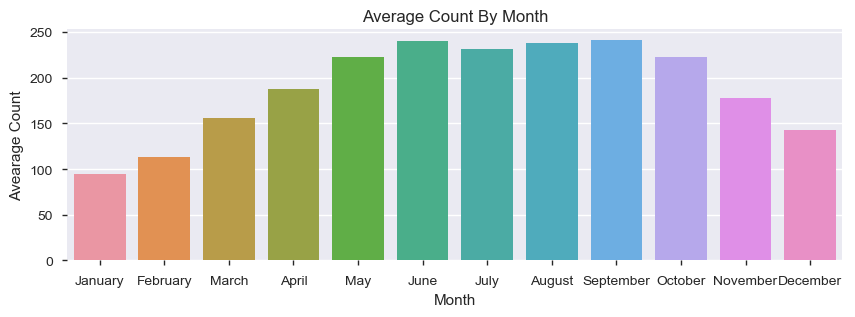

In [11]:
# Checking Average Count of Users By Month
fig,(ax1)= plt.subplots(nrows=1)
fig.set_size_inches(10,3)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]


monthAggregated = pd.DataFrame(data.groupby("mnth")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False)
sn.barplot(data=monthSorted,x="mnth",y="count",ax=ax1,order = sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

#### It can be seen peak hours of booking the bike is during office hours near about 8 a.m. in the morning and 17:00 in the evening.

[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across Season'),
 None]

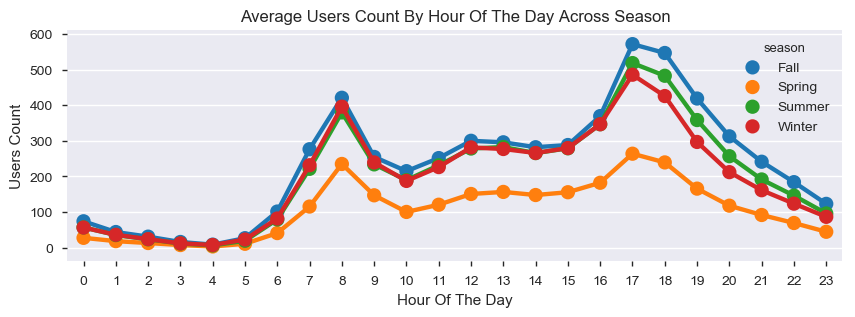

In [12]:
# Plotting Graph to check the traffic during Hour of the Day Across All seasons
fig,(ax2)= plt.subplots(nrows=1)
fig.set_size_inches(10,3)
hourAggregated = pd.DataFrame(data.groupby(["hr","season"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hr"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

#### We can see that bike users have the same pattern of usage across all days except for fridat where is peak rise of bike usage near 8 a.m. and 5 p.m. respectively.

[Text(0,0.5,'Users Count'),
 Text(0.5,0,'Hour Of The Day'),
 Text(0.5,1,'Average Users Count By Hour Of The Day Across Weekdays'),
 None]

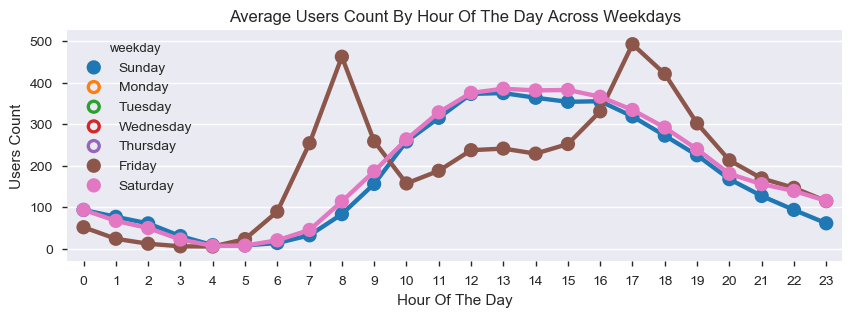

In [13]:
# Checking average count of uses accross week
fig,(ax3)= plt.subplots(nrows=1)
fig.set_size_inches(10,3)
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

hourAggregated = pd.DataFrame(data.groupby(["hr","weekday"],sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hr"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')


#### Findings from pearson and spearman correaltion plots.
    1. As we found from profiling 'atemp' and 'temp' are highly correlated so tired to check their correaltion with our dependent variable 'cnt'. We found out that both has the same realtion with dependent varaible.
    2. Remove 'atemp' variable from the dataset based on profiling and correlation matrix.
    3. From the correaltion plots and as we have a continuous predictor variable we will start building with simple linear regression.

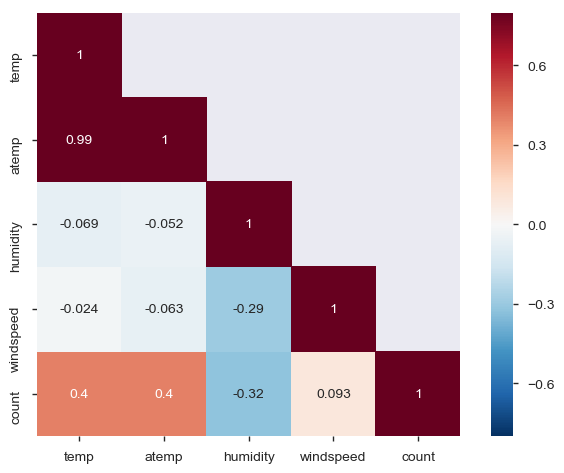

In [41]:
#Pearson Correlation Plot for the data

temp=modelData.iloc[7:]
# Compute the correlation matrix
corr = temp.corr(method='pearson')

mask = np.array(corr)

# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sn.heatmap(corr, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)


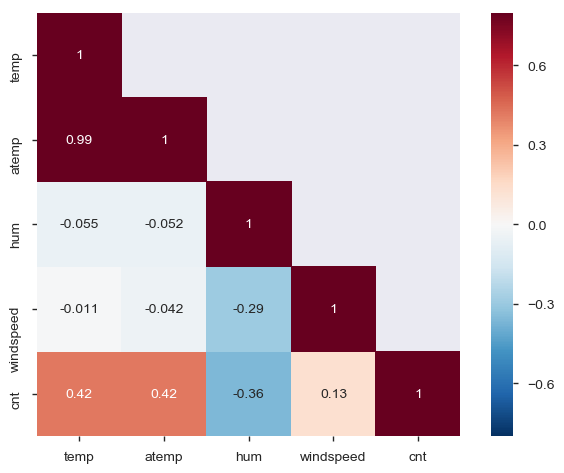

In [15]:
# Compute the spearman correlation matrix
corr = temp.corr(method='spearman')

mask = np.array(corr)

# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sn.heatmap(corr, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

In [39]:
modelData.head(1)

,season,yr,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16


In [16]:
modelData.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

In [17]:
data_dummy = modelData

def dummify_dataset(df, column):       
    df = pd.concat([pd.get_dummies(df[column], prefix=column, drop_first=False),df],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather','yr']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
    
data_dummy.head(2)

,yr_0,yr_1,weather_1,weather_2,weather_3,weather_4,workingday_0,workingday_1,weekday_0,weekday_1,...,month_12,season_1,season_2,season_3,season_4,temp,atemp,humidity,windspeed,count
0,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0.24,0.2879,0.81,0.0,16
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0.22,0.2727,0.80,0.0,40


In [18]:
#Splitting data into feature variables and target variables
X_data = data_dummy.iloc[:, :-1]
y_target = data_dummy.iloc[:, -1]

In [19]:
X_data.shape , y_target.shape

((17379, 61), (17379,))

In [20]:
#Doing a train test split of data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, shuffle = True, test_size = 0.3,random_state =0)

In [21]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
lreg = LinearRegression()

In [22]:
#Scores
scores = cross_val_score(lreg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Train Score {:.2f}".format(scores.mean()))
lreg.fit(X_train, y_train)
test_score = lreg.score(X_test,y_test) 
print("Test Score {:.2f}".format(test_score))

Cross-validation scores: [0.68834851 0.68647581 0.68203086 0.67339119 0.69013699]
Train Score 0.68
Test Score 0.68


In [23]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model = Ridge(random_state=0)
param_Ridge = {'alpha': np.logspace(-3, 3, 13)}
print("Parameter grid:\n{}".format(param_Ridge))
grid_Ridge = GridSearchCV(estimator = model,param_grid = param_Ridge, cv=5, return_train_score=True,scoring='r2')

Parameter grid:
{'alpha': array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03])}


In [24]:
grid_Ridge.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-03, 3.16228e-03, 1.00000e-02, 3.16228e-02, 1.00000e-01,
       3.16228e-01, 1.00000e+00, 3.16228e+00, 1.00000e+01, 3.16228e+01,
       1.00000e+02, 3.16228e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

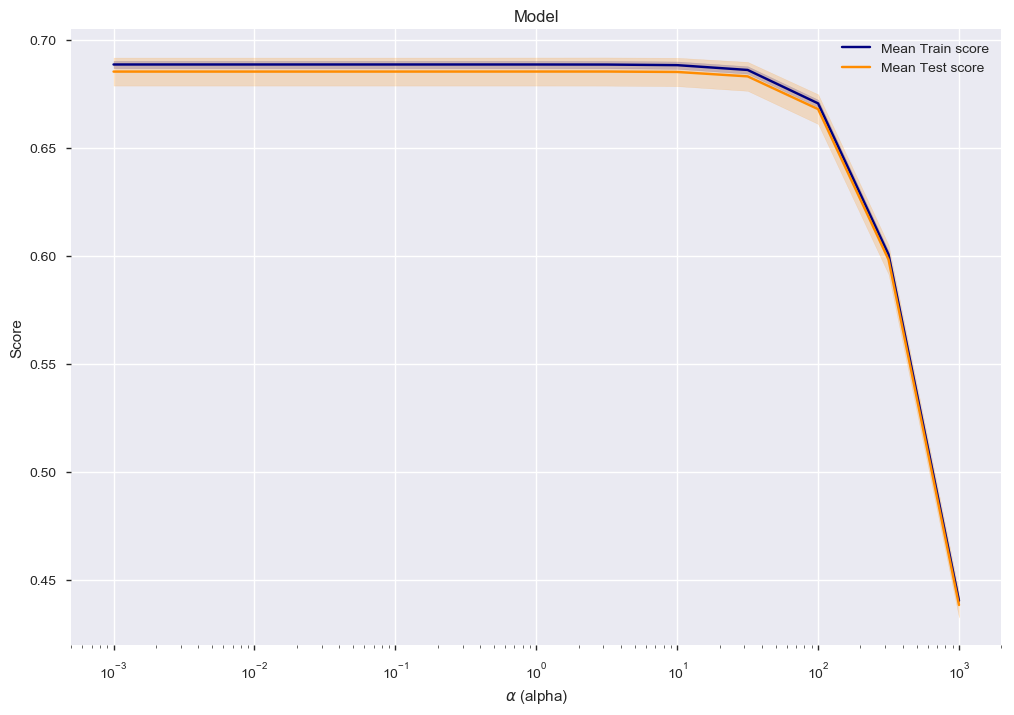

In [25]:
alphas = np.logspace(-3, 3, 13)

train_scores_mean = grid_Ridge.cv_results_["mean_train_score"]
train_scores_std = grid_Ridge.cv_results_["std_train_score"]
test_scores_mean = grid_Ridge.cv_results_["mean_test_score"]
test_scores_std = grid_Ridge.cv_results_["std_test_score"]

plt.figure(figsize = (12,8))
plt.title('Model')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('Score')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Train score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Test score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [26]:
print("Best cross-validation score: {:.2f}".format(grid_Ridge.best_score_))
print("Best parameters: {}".format(grid_Ridge.best_params_))
print("Training Score: {}".format(grid_Ridge.score(X_train, y_train)))
print("Testing Score: {}".format(grid_Ridge.score(X_test, y_test)))

Best cross-validation score: 0.69
Best parameters: {'alpha': 1.0}
Training Score: 0.6881394582349301
Testing Score: 0.6804304775707222
